# Naive Bayes


Naive Bayes (NB) is one of the simplest yet surprisingly powerful algorithms in the field of Machine Learning. It is rooted in probability theory and is fundamentally a classification algorithm, meaning it assigns objects (or data points) to predefined categories or classes based on their features.

NB is computationally efficient and easy to implement, which makes it ideal for quick prototyping and handling large datasets. It found it's first widespread application in email spam filtering and content recommendation systems. It remains a popular choice for text classification tasks, including sentiment analysis, due to its efficacy with high-dimensional data, and in real-time comment moderation on various online platforms. It is also widely used in academic research, such as in medicine and biology, where it is used to identify patterns or make predictions based on genomic or clinical data.

### **Why Naive Bayes:**
Despite its simplicity and ‘naivety’, Naive Bayes has several advantages that make it a good choice in specific scenarios.

- **Simplicity & Efficiency:**
    - It performs well with high-dimensional data, where many features are involved, like text data.

- **Probabilistic Nature:**
    - It provides probabilities for the outcomes, allowing for a graded measure of classification confidence, which is not always the case with decision trees or SVMs.
    - This probabilistic nature allows for the incorporation of uncertainty in the model, which can be crucial in certain domains like healthcare.

- **Robust to Irrelevant Features:**
    - Due to its conditional independence assumption, it can be robust to irrelevant features.
    - In contrast, decision trees can create overly complex trees and overfit to noise in the presence of irrelevant features.

- **Performs Well with Less Data:**
    - Unlike more complex models like neural networks, it can perform reasonably well with a smaller amount of training data.
    - This makes it suitable for scenarios where collecting vast amounts of labeled data is not feasible.

### **Probability Theory Introduction:**

To lay the groundwork for Naive Bayes, it is important to have a basic understand of probability theory.  We'll cover some of the rudiments here.

#### **Basic Probability** ####

- An **event** is an outcome or a combination of outcomes from a random experiment. It's a set containing all the outcomes of interest. For example, when tossing a coin (an experiment), a set of two events are possible: Getting a Head (H) or a Tail (T).
   
- **Probability** quantifies the likelihood that a given event will occur. The probability of an event $A$ occurring is denoted by $P(A)$. For example, the probability of getting a Head (H) in a fair coin toss is $\frac{1}{2}$ or 0.5.  In general, if $N$ events in an experiment have the same likelihood, the probability of any one of them occurring is $\frac{1}{N}$.

![Probability image](assets/probability_theory1.png)

- **Joint Probability** is the probability of two multiple occurring together in a given experiment. The joint probability of events $A$ and $B$ is denoted by $P(A \cap B)$, $P(A \text{ and } B)$, or sometimes $P(A,B)$.  The order of $A$ and $B$ do not matter - that is, $P(A \cap B) = P(B \cap A)$.

  When flipping a coin in an experiment with one flip, the joint probability of getting a heads and a tails is 0, as only one event can occur in the experiment and these are mutually exclusive events.

![Joint probability image](assets/joint_probability_diagram.webp)

- Two events are said **independent** if the occurrence of one event does not affect the occurrence of the other. If $A$ and $B$ are independent, then $P(A \cap B) = P(A) \cdot P(B)$. For example, if an experiment covers two successive coin tosses, getting a Head (H) in the first toss is independent of getting a Head (H) in the second toss. Therefore $P(H_{1} \cap H_{2}) = P(H_{1}) \cdot P(H_{2}) = .5 \cdot .5 = .25$

#### **Conditional Probability**

When events are not independent though, we need to calculate their joint probability in a different way.  For example, suppose an experiment involves choosing two cards from a standard deck of 52 cards. If the first card is a queen, what is the probability of choosing another so that the final draw is two queens? Because the two events are no longer independent, we need another way to calculate the overall probability.
 **Conditional probability** is the probability of an event occurring given that another event has occurred. The probability of event $A$ given event $B$ has occurred is denoted by $P(A|B)$.  Unlike with joint probability, order in notation matters - $P(A|B)$ is not the same as $P(B|A)$.

The relationship between joint probability and conditional probably can be expressed as:

$$P(A,B) = P(A) \cdot P(B|A)$$

Flipping this around gives us the definition of conditional probability:

$$P(B|A) = \frac{P(A,B)}{P(A)}, \text{if } P(A) \neq 0$$

Considering the example of drawing two queens, the probability of drawing the first queen $P(Q_1)$ is $\frac{4}{52} =~.078$.  However, the probability of drawing a second queen $Q_2$ after the first, $P(Q_2|Q_1) = \frac{3}{51} =~ .59$.  Therefore, the joint probability $P(Q_1,Q_2) = P(Q_1) \cdot P(Q_2|Q_1) = \frac{1}{13} \cdot  \frac{1}{17} = \frac{1}{221}$.

**Sequential events vs. concurrent evidence**

Note that there are two types of conditional probability; that wherein two events are connected in time (e.g., sequential card draws), and that wherein one event serves as evidence of another (e.g., a funny noise from the engine suggests a mechanical failure).  There is no formal distinction between these two kinds of conditional probability, but which one we're working with may have implications for modeling in a given domain. 

#### **Bayes’ Theorem:**

Bayes theorem, named after the statistician and philosopher Reverend Thomas Bayes, builds on the relationship between joint probability and conditional probability described above.  Bayes’ theorem relates the conditional and *marginal* probabilities of random variables. The marginal probability is just the overall probability of an event, disregarding the outcomes of other events - it can be thought of as an aggregate probability given all of the possible ways the event can occur. 

Bayes theorem provides us with a a way to update our previous beliefs based on new evidence. Given two events A and B, we know that:

$$P(A,B) = P(B|A)\cdot P(A)$$

and also that:

$$P(B,A) = P(A|B) \cdot P(B)$$

but since $P(A,B) = P(B,A)$,

$$P(B|A)\cdot P(A) = P(A|B) \cdot P(B)$$

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

The components of Bayes Theorem are sometimes referred to as follows:

1. **Posterior Probability, $P(A|B)$:** This is what we are trying to find out: the probability of our hypothesis $A$ being true, given the observed evidence $B$. It’s what we know after we have taken into account the evidence, hence it’s called the posterior, meaning it’s what we know afterward.
2. **Likelihood, $P(B|A)$:** The probability of observing the given evidence $$ if our hypothesis $A$ is true. It quantifies how well our evidence supports our hypothesis. How likely are you to see the evidence under your hypothesis? It’s called likelihood because it tells us about the likelihood of seeing our observations.
3. **Prior Probability, $P(A)$:** This is our initial belief about the probability of hypothesis $A$ before observing the evidence $B$. It’s based on previous knowledge or experience. It’s our prior belief or knowledge about the hypothesis before seeing the evidence. It’s what we know prior to observing the evidence.
4. **Evidence, $P(B)$:**  It represents the probability of observing the evidence $B$. It’s the normalizing constant ensuring that our posterior probabilities sum up to one. It’s what we observe; it’s the data we have, the evidence we see, hence the name.

**Example**

Rhe marginal probability a woman has breast cancer is 0.8 percent. If a woman has breast cancer, the probability is 90 percent that she will have a positive mammogram. If a  woman does not have breast cancer, the probability is 7 percent that she will still have a positive mammogram. _What is is the probability a woman has breast cancer given a positive mammogram?_

We can solve this using Bayes Theorem as follows.  First, consider:

- $P(A|B)$ is the **posterior probability** that a woman has breast cancer given that she has a positive mammogram.
- $P(B|A)$ is the **likelihood** of a positive mammogram given that a woman has breast cancer, 90% or 0.9.
- $P(A)$ is the marginal, or **prior** probability that a woman has breast cancer, 0.8% or 0.008.
- $P(B)$ is the overall probability of a positive mammogram; this is the probability of the **evidence**.

One useful way to understand this is via a contingency table. Let’s consider 1000 women.

- 0.8% of 1000 women have breast cancer: $0.008 \times 1000 = 8$ women.
- 99.2% of 1000 women do not have breast cancer: $0.992 \times 1000 = 992$ women.

So the table starts to look like this:


|  | Positive Mammogram | Negative Mammogram | Total |
|---|---|---|---|
| Cancer  | | | 8 |
| No Cancer | | | 992 |

Now we can calculate specific probabilities:

- Of the 8 women with breast cancer, 90% will have a positive mammogram: $0.9 \times 8 = 7.2 \approx 7$ women.
- Of the 992 women without breast cancer, 7% will still have a positive mammogram: $0.07 \times 992 = 69.44 \approx 69$ women.

So, the table becomes:

|  | Positive Mammogram | Negative Mammogram | Total |
|---|---|---|---|
| Cancer  | 7 | 1 | 8 |
| No Cancer | 69 | 923 | 992 |
| Total | 76 | 924 | 1000 |

Applying Bayes theorem, we can find the probability that a woman has breast cancer given she has a positive mammogram:

- $P(B|A) = 0.9$ (probability of a positive mammogram given breast cancer)
- $P(A) = 0.008$ (marginal probability of breast cancer)
- $P(B)$ is the overall probability of a positive mammogram, which is the sum of the probability of a positive mammogram with cancer and without cancer. From our table, we can see this as $\frac{76}{1000} = 0.076$.

Plugging in these values gives us:

$$P(A|B) = \frac{0.9 \cdot 0.008}{0.076} \approx 0.0947$$

So, the probability that a woman has breast cancer given that she has received a positive mammogram is approximately 9.47%.

**Note**

Although we've used a contingency table to help visualize the probability calculations here, we can derive the marginal probability that a woman will receive a positive mammogram can be calculated as the sum of the probability of a true positive and the probability of a false positive.

Given:
- $P(A)$: The probability a woman has breast cancer, which is 0.8% or 0.008.
- $P(A')$: The probability a woman does not have breast cancer, which is 0.992.
- $P(B|A)$: The probability of a positive mammogram given a woman has breast cancer, which is 0.9.
- $P(B|A')$: The probability of a positive mammogram given a woman does not have breast cancer, i.e., the probability of a false positive, which is 0.07.

Using the Law of Total Probability, the marginal probability of a positive mammogram, $P(B)$, is given by:

$$P(B) = P(B|A) \cdot P(A) + P(B|A') \cdot P(A')$$

Plugging in the known values:

$P(B) = (0.9 \cdot 0.008) + (0.07 \cdot 0.992)$
$P(B) = 0.0072 + 0.06944$
$P(B) = 0.07664$

So, the marginal probability that a woman will receive a positive mammogram is approximately $7.664\%$.

**Interpretation**
This result is crucial in medical testing and diagnosis, demonstrating that even with a seemingly accurate test, the actual probability of having the disease can be much lower due to the rarity of the condition and the presence of false positives. This example underscores the importance of considering base rates (or prior probabilities) and the probabilities of false positives and false negatives when interpreting diagnostic test results.

### **Naive Bayes**

When predicting the likelihood of breast cancer, clinicians often consider multiple pieces of evidence or features, such as:
1. Family History (Present/Absent)
2. Positive Mammogram (Yes/No)
3. Alcohol Use (Yes/No)

Given these three features, there are $2^{3} = 8$ different feature combinations for each individual, i.e., each individual can be represented in one of 8 different states regarding these features. Furthermore, for each of these states, an individual could either have cancer or not, resulting in a total of $2 \times 2^{3} = 16$ possible scenarios:

| P(Cancer)           | P(No Cancer)         |
|---------------------|----------------------|
| P(C \| +M, +F, +A)  | P(¬C \| +M, +F, +A)  |
| P(C \| +M, +F, -A)  | P(¬C \| +M, +F, -A)  |
| P(C \| +M, -F, +A)  | P(¬C \| +M, -F, +A)  |
| P(C \| +M, -F, -A)  | P(¬C \| +M, -F, -A)  |
| P(C \| -M, +F, +A)  | P(¬C \| -M, +F, +A)  |
| P(C \| -M, +F, -A)  | P(¬C \| -M, +F, -A)  |
| P(C \| -M, -F, +A)  | P(¬C \| -M, -F, +A)  |
| P(C \| -M, -F, -A)  | P(¬C \| -M, -F, -A)  |


If we were to compute the conditional probabilities for cancer presence based on each of these combinations directly, the number of probabilities would grow exponentially with each additional feature. Moreover, acquiring sufficient data for each of these exponentially growing states can be challenging, leading to sparsity issues, which can in turn lead to unreliable probability estimates.

This is where the Naive Bayes algorithm comes in as a solution. It simplifies the calculation by assuming that each feature is independent of the other features given the class label, hence the term “Naive”. It means that the presence or absence of a particular feature does not affect the presence or absence of any other feature, as long as we know the class label.

#### **Mathematical Framework:**
Mathematically, if we denote the class variable as $C$ (Cancer/No Cancer) and the features as $F_1, F_2, F_3$ (Family History, Mammogram Result, Alcohol Use), the Naive Bayes model represents the joint distribution as follows:

$$P(C, F_1, F_2, F_3) = P(C) \cdot P(F_1 | C) \cdot P(F_2 | C) \cdot P(F_3 | C)$$

That is, we have effectively ignored all of the interactions here, reducing the problem of probability estimation from one where we need $2 \times 2^n$ probabilities for $n$ features and 2 outcomes, to one in which we only need $2 * n$ probabilities.  

Despite its simplicity and the naivety in its assumptions, Naive Bayes can be surprisingly effective in practice, especially when the dimensionality of the data is high, and the data is sparse, which often occurs in text classification, spam filtering, and medical diagnosis.

#### **Applying Bayes Rule for Classification**

Given a class variable $C$ (e.g., Cancer or No Cancer) and a set of feature variables $F_1, F_2, ..., F_n$ (e.g., Family History, Mammogram Result, Alcohol Use, etc.), the task is to compute the probability of a particular class $C$ given the observed features.According to Bayes’ Rule, the probability of class $C$ given the features is computed as:

$$P(C | F_1, F_2, ..., F_n) = \frac{P(F_1, F_2, ..., F_n | C) \cdot P(C)}{P(F_1, F_2, ..., F_n)}$$

Under the Naive Bayes assumption of conditional independence of features given the class, the likelihood term simplifies as:

$$P(F_1, F_2, ..., F_n | C) = P(F_1 | C) \cdot P(F_2 | C) \cdot ... \cdot P(F_n | C)$$

Plugging the simplified likelihood back into Bayes' Rule gives us the Naive Bayes formula for computing the posterior probability:

$$P(C | F_1, F_2, ..., F_n) = \frac{P(C) \cdot \prod_{i=1}^{n} P(F_i | C)}{P(F_1, F_2, ..., F_n)}$$

In a classification task, we typically are interested in finding the class with the highest posterior probability, i.e., we choose the class $C$ that maximizes $P(C | F_1, F_2, ..., F_n)$. Since the denominator is constant for all classes, we can omit it for the purpose of maximizing the expression, and we get:

$$\hat{C} = \arg\max_C P(C) \cdot \prod_{i=1}^{n} P(F_i | C)$$

More concretely, if we were predicting whether a person has cancer ($C$) based on a set of features such as family history ($F_1$), mammogram result ($F_2$), and alcohol use ($F_3$), we would calculate the probability of cancer and no cancer for each combination of feature values and choose the one with the higher probability.

### Exercise

Under the naive Bayes assumption, predict whether someone with a positive mammogram, a family history of cancer, and who uses alcohol has cancer.  As a reminder, here are the steps:

1. Calculate prior probabilities
2. Calculate conditional probabilities
3. Multiply to find the more likely outcome


In [1]:
import pandas as pd

# Data
data = {
    'Example': [1, 2, 3, 4, 5, 6, 7],
    'Positive Mammogram': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'],
    'Family History': ['Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No'],
    'Alcohol': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'Cancer': ['Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']
}

# Creating DataFrame
df = pd.DataFrame(data)

# Displaying DataFrame
df


,Example,Positive Mammogram,Family History,Alcohol,Cancer
0,1,Yes,Yes,Yes,Yes
1,2,Yes,Yes,No,Yes
2,3,No,Yes,Yes,Yes
3,4,Yes,No,No,No
4,5,Yes,No,Yes,No
5,6,No,No,Yes,No
6,7,No,No,No,No





### Smoothing

Note in the preceding example, the probability of not having cancer was zero because there were no instances of individuals with cancer that also had a family history in our data - but it's quite likely we just didn't have enough data.  In order to address this, we'd like to replace zeros with a very small value - this would mean that all other probabilities would need to shrink a little bit.  This process is called _smoothing_.

#### Laplacian Smoothing:

Laplacian Smoothing (also called add-one smoothing) is a technique used to address the problem of zero probabilities in categorical data modeling, including Naive Bayes classification. Laplacian Smoothing works by adjusting the probability calculation to assume that each possible combination of feature and class has been observed at least once.

The adjusted probability $P'$ with Laplacian Smoothing is calculated as follows:

$$P'(x|C) = \frac{f + 1}{N + k}$$

Where:
- $ P'(x|C) $ is the adjusted probability of feature $ x $ given class $ C $.
- $ f $ is the observed frequency of $ x $ with class $ C $ in the training data.
- $ N $ is the total number of observations of class $ C $ in the training data.
- $ k $ is the number of possible values (categories) of the feature.

### Exercise with Family History Feature:

Use LaPlacian smoothing to calculate the probabilities for the `family history` feature in the preceding data.

### Continuous variables


When working with continuous variables in a Naive Bayes classifier, there are mainly two methods:
1. **Discretization**: Transforming continuous variables into discrete ones, usually by creating bins or intervals.
   - **Equal Width Binning**: The range of the variable is divided into equally sized bins.
   - **Equal Frequency Binning**: Bins are created such that each bin has approximately the same number of observations.
   
2. **Probability Density Estimation**: Assuming a certain distribution for the continuous variable (e.g., Normal distribution) and using the probability density function (PDF) to estimate probabilities.

In the following, I'll show you how to use probability density to calculate probabilities.


### Example

Given the following dataset (introduced previously), we have "Taxable Income" as a continuous variable. 

| Tid | Refund | Marital Status | Taxable Income (K) | Cheat |
|-----|--------|----------------|--------------------|-------|
| 1   | Yes    | Single         | 125                | No    |
| 2   | No     | Married        | 100                | No    |
| 3   | No     | Single         | 70                 | No    |
| 4   | Yes    | Married        | 120                | No    |
| 5   | No     | Divorced       | 95                 | Yes   |
| 6   | No     | Married        | 60                 | No    |
| 7   | Yes    | Divorced       | 220                | No    |
| 8   | No     | Single         | 85                 | Yes   |
| 9   | No     | Married        | 75                 | No    |
| 10  | No     | Single         | 90                 | Yes   |


First, we will assume that "Taxable Income" follows a Normal distribution and use the Probability Density Function (PDF) to estimate probabilities (note that we can check this assumption!).

The Normal distribution is defined by two parameters: the mean (μ) and the standard deviation (σ). For each class (Cheat/No Cheat), we need to estimate these parameters for "Taxable Income".

Let's find the parameters for the "No Cheat" class:

- We will filter out the instances where Cheat = 'No'.
- Calculate the mean and standard deviation of "Taxable Income" for these instances.

##### Calculating Parameters for "No Cheat" class
For instance, let’s say we have filtered out the following Taxable Incomes for "No Cheat": [125, 100, 70, 120, 60, 220, 75]
- Mean (μ): $\frac{125 + 100 + 70 + 120 + 60 + 220 + 75}{7}$
- Standard Deviation (σ): It’s the square root of the variance, where variance is the average of the squared differences from the Mean.



In [4]:
import pandas as pd
import numpy as np

data = {
    'Tid': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Refund': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
    'Marital Status': ['Single', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Single'],
    'Taxable Income (K)': [125, 100, 70, 120, 95, 60, 220, 85, 75, 90],
    'Cheat': ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Display the DataFrame
result = df.groupby("Cheat")["Taxable Income (K)"].agg([np.mean,np.std])
result

/var/folders/xr/kt3mj1zd5q301hfqvry58zt5q2b8fk/T/ipykernel_50278/2558457033.py:15: FutureWarning: The provided callable <function mean at 0x110644ee0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  result = df.groupby("Cheat")["Taxable Income (K)"].agg([np.mean,np.std])
/var/folders/xr/kt3mj1zd5q301hfqvry58zt5q2b8fk/T/ipykernel_50278/2558457033.py:15: FutureWarning: The provided callable <function std at 0x110645000> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'std' instead.
  result = df.groupby("Cheat")["Taxable Income (K)"].agg([np.mean,np.std])


,mean,std
Cheat,,
No,110.0,54.543561
Yes,90.0,5.000000




Once we have the parameters, we can calculate the probability density of any new incoming instance of taxable income using the Probability Density Function for a Normal Distribution:

$$ f(x | μ, σ) = \frac{1}{σ \sqrt{2π}} e^{-\frac{(x-μ)^2}{2σ^2}} $$

In Python, we can visualize the normal curves corresponding to this definition like:

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/

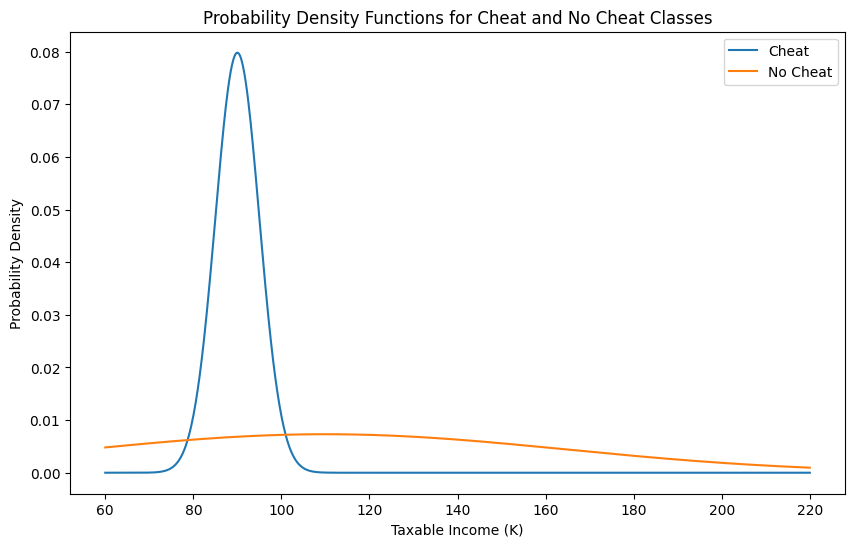

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Separate the data into two DataFrames: one for 'Cheat' and one for 'No Cheat'
df_cheat = df[df['Cheat'] == 'Yes']
df_no_cheat = df[df['Cheat'] == 'No']

# Calculate the mean and standard deviation for each class
mean_cheat, std_cheat = df_cheat['Taxable Income (K)'].mean(), df_cheat['Taxable Income (K)'].std()
mean_no_cheat, std_no_cheat = df_no_cheat['Taxable Income (K)'].mean(), df_no_cheat['Taxable Income (K)'].std()

# Define the range of taxable income
x = np.linspace(min(df['Taxable Income (K)']), max(df['Taxable Income (K)']), 1000)

# Plot the PDFs
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=norm.pdf(x, mean_cheat, std_cheat), label='Cheat')
sns.lineplot(x=x, y=norm.pdf(x, mean_no_cheat, std_no_cheat), label='No Cheat')
plt.title('Probability Density Functions for Cheat and No Cheat Classes')
plt.xlabel('Taxable Income (K)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


Suppose we get a new instance with a Taxable Income of 120K, and we want to know the probability of this instance being in the "No Cheat" class, we would substitute $x = 110$, $μ$, and $σ \approx 54.6$ of "No Cheat" class in the above equation to get the probability density.

In [20]:
import scipy.stats as stats

# Assume mean and std have been calculated as mean_no_cheat and std_no_cheat
# For a new instance with taxable income = 120
stats.norm.pdf(120, loc=mean_no_cheat, scale=std_no_cheat)


0.00719229535941955

#### Assessing normality

There are a number of ways to check if data is normally distributed.  

Sure, assessing the normality of a data distribution is often a crucial step, especially when employing methods that make assumptions about the data distribution, like the Gaussian Naïve Bayes. Here are a few methods to check the normality of your data.

#### 1. **Visual Inspection:**
   - **Histogram**: Plotting a histogram of your dataset can provide a good approximation of the underlying distribution. A bell-shaped curve usually signifies a normal distribution.
   - **Q-Q Plot (Quantile-Quantile plot)**: A Q-Q plot helps you to visually check if the data follows a normal distribution. If the data is normally distributed, the points in the Q-Q plot will fall in a straight line.

#### 2. **Statistical Tests:**
   - **Shapiro-Wilk Test**: This test is widely used for testing the normality of a data set and is effective for small sample sizes. A p-value less than the chosen alpha level (e.g., 0.05) indicates that the data does not follow a normal distribution.
   - **Anderson-Darling Test**: This is another statistical test used to test if a data sample belongs to a population with a specific distribution (normal, in this case).
   - **Kolmogorov-Smirnov Test**: This non-parametric test compares a sample with a reference probability distribution. It’s more suitable for large samples.

#### 3. **Descriptive Statistics:**
   - **Skewness and Kurtosis**: These are numerical measures that can suggest the symmetry and tailedness of a distribution, respectively. For a normal distribution, both skewness and kurtosis are 0. However, they are more useful for detecting non-normality than confirming normality.

Here's an example of how you might implement some of these in Python.

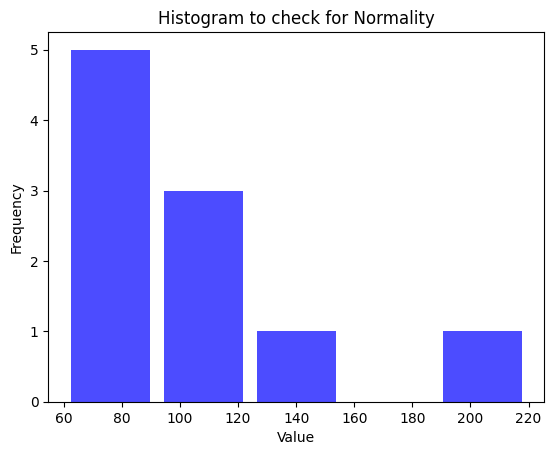

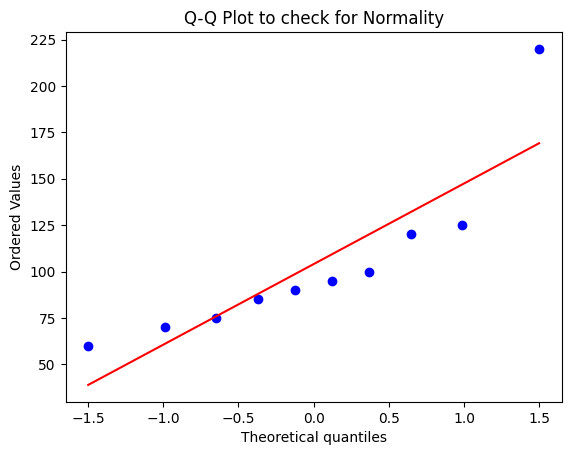

In [18]:

import scipy.stats as stats
import matplotlib.pyplot as plt

data = df['Taxable Income (K)']

# Histogram
plt.hist(data, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram to check for Normality')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot to check for Normality')
plt.show()

In [19]:
shapiro_test_stat, shapiro_p_value = stats.shapiro(data)
if shapiro_p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

The data is not normally distributed.


#### Non-normal distributions

If your data is not normal, and you are uncertain what kind of distribution it falls into, you can adopt a non-parametric method to estimate your probabilities.  One approach is to use a kernel density estimate.

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/

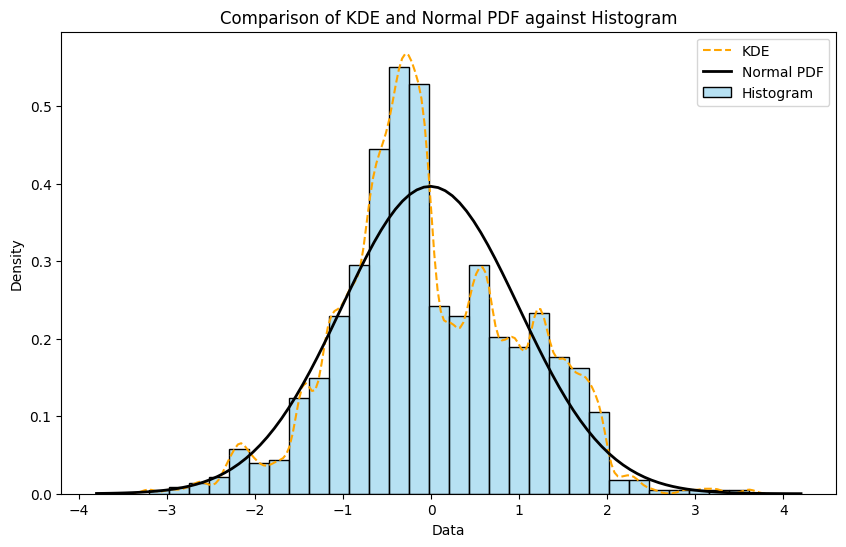

In [21]:
np.random.seed(0)
n_samples = 1000
x = np.linspace(-5, 5, n_samples)

# Generate a standard normal distribution
normal_pdf = norm.pdf(x, loc=0, scale=1)

# Generate a sawtooth wave
sawtooth_wave = 0.5 * (1 + np.mod(x, 2))

# Combine the normal distribution with the sawtooth wave
combined_data = normal_pdf * sawtooth_wave

# Sample from the custom distribution
data_samples = np.random.choice(x, size=n_samples, p=combined_data/combined_data.sum())

plt.figure(figsize=(10, 6))

# Plot histogram of the sampled data
sns.histplot(data_samples, kde=False, stat='density', bins=30, label='Histogram', color='skyblue', alpha=0.6)

# Plot KDE
sns.kdeplot(data_samples, bw_adjust=0.3, label='KDE', color='orange', linestyle='dashed')

# Fit and plot normal PDF to the sampled data
mean, std = norm.fit(data_samples)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal PDF')

# Title and labels
plt.title('Comparison of KDE and Normal PDF against Histogram')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()

plt.show()


To sample from a KDE of a distribution requires a few steps:

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/

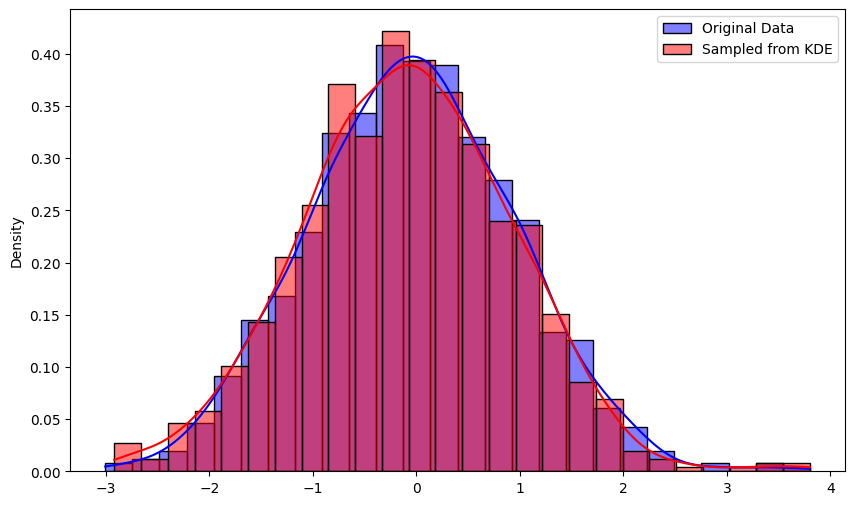

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example Data
data_samples = np.random.normal(0, 1, 1000)

# Create KDE
# Create KDE
kde = gaussian_kde(data_samples)

# Generate a range of points
x = np.linspace(min(data_samples), max(data_samples), 1000)

# Compute the PDF at each point in the range and then compute the CDF
pdf_vals = kde.evaluate(x)
cdf_vals = np.cumsum(pdf_vals) * (x[1] - x[0])  # Assuming x is uniformly spaced

# Perform inverse transform sampling
new_samples = np.interp(np.random.uniform(0, 1, 1000), cdf_vals, x)


plt.figure(figsize=(10, 6))
sns.histplot(data_samples, kde=True, stat='density', label='Original Data', alpha=0.5, color='blue')
sns.histplot(new_samples, kde=True, stat='density', label='Sampled from KDE', alpha=0.5, color='red')
plt.legend()
plt.show()


Remember that all the methods mentioned above have their own limitations, and in practice, it’s often recommended to use them in combination to thoroughly assess the normality of your data. Additionally, it’s crucial to remember that real-world data often deviate from idealized normal distributions, so the goal is usually to ascertain whether the data is close enough to normal for the purposes of your analysis.

### Using Naive Bayes in Scikit Learn

While the underlying theory of Naive Bayes may be a bit daunting, running Naive Bayes in sklearn is quite straightforward.

In [25]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.5, random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)
print("Model Accuracy:", (preds == y_test).sum() / y_test.shape[0])

Model Accuracy: 0.9866666666666667


There are several different versions of Naive Bayes implemented in SKLearn:

1. **MultinomialNB**: This is suitable for discrete data and is used for features that represent counts or frequency of occurrence of events. Often used in text classification.
   
2. **BernoulliNB**: Designed for binary/boolean features, which can be especially useful for binary representation of feature presence or absence (like a one-hot encoded feature).
   
3. **ComplementNB**: This is suitable for imbalanced datasets and is a modification of MultinomialNB.

4. **CategoricalNB**: It is designed for categorical features, and it assumes that each feature has its own categorical distribution.

**Differences among them:**

- **GaussianNB** assumes that continuous features follow a normal distribution.
- **MultinomialNB**, **ComplementNB**, and **BernoulliNB** are suitable for discrete count data, with each having different suitability based on the nature of the data (binary, discrete counts, etc.).
- **CategoricalNB** is specialized for handling categorical features.


Note that all the Naive Bayes algorithms in scikit-learn are parametric. They assume a specific form for the likelihood function P(X|Y) (normal distribution for GaussianNB, multinomial distribution for MultinomialNB, etc.). Scikit-learn does not currently offer a non-parametric Naive Bayes algorithm out of the box that would allow for more flexible estimation of P(X|Y) without assuming a specific distribution, such as by using kernel density estimation.

However, you can potentially extend or implement your own version of a non-parametric Naive Bayes classifier using Kernel Density Estimation (KDE) or other non-parametric density estimation techniques for handling continuous data. Keep in mind that this would involve more complexity and would require a good understanding of both the Naive Bayes algorithm and non-parametric density estimation methods.

### Exercise

The [Federalist Papers](https://www.gutenberg.org/ebooks/18_) are a set of documents written by Alexander Hamilton, John Jay, and James Madison.  One commonly use data analytics example involves trying to infer the authorship for a set of papers with 'disputed' provenance based on the frequency of terms used in the documents.

Use Naive Bayes and a Decision Tree to solve this problem.  Be sure to split the test data (marked 'dispt') out of the data before training your model. Which appears to work better.  Why?

In [24]:
df = pd.read_csv("data/federalistpapers.csv")
df

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Madison,Madison_fed_45.txt,0.136,0.054,0.014,0.048,0.422,0.027,0.048,0.150,...,0.020,0.027,0.007,0.000,0.116,0.007,0.218,0.102,0.075,0.0
81,Madison,Madison_fed_46.txt,0.212,0.028,0.006,0.050,0.391,0.033,0.073,0.117,...,0.067,0.011,0.022,0.000,0.128,0.028,0.223,0.095,0.162,0.0
82,Madison,Madison_fed_47.txt,0.177,0.052,0.047,0.047,0.436,0.026,0.135,0.083,...,0.021,0.021,0.010,0.010,0.114,0.031,0.016,0.099,0.021,0.0
83,Madison,Madison_fed_48.txt,0.243,0.091,0.008,0.084,0.372,0.008,0.046,0.137,...,0.023,0.023,0.008,0.000,0.213,0.038,0.076,0.061,0.023,0.0
